In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, classification_report, f1_score, fbeta_score, make_scorer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.compose import make_column_transformer
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as imb_pipeline

from xgboost import XGBClassifier



pd.set_option('display.float_format', lambda x: '%.2f' % x)
RSEED = 42

In [3]:
# df = pd.read_csv('data/cleaned/train.csv')
# df_test = pd.read_csv('data/cleaned/test.csv')
df = pd.read_csv('data/cleaned/train_extended.csv')
df_test = pd.read_csv('data/cleaned/test_extended.csv')
df.head()


,district,client_id,client_catg,region,reading_remarque_6,reading_remarque_7,reading_remarque_8,reading_remarque_9,reading_remarque_413,counter_statue_0,...,counter_coefficient_30,counter_coefficient_33,counter_coefficient_40,counter_coefficient_50,counter_code_count_unique,counter_number_count_unique,counter_type_count_unique,months_number,consommation_sum,target
0,60,train_Client_29310,11,101,18,0,6,34,0,56,...,0,0,0,0,2,3,2,3.93,734.81,0.00
1,63,train_Client_128477,11,312,1,0,2,1,0,4,...,0,0,0,0,1,1,1,3.50,325.75,0.00
2,63,train_Client_56966,11,311,40,0,15,23,0,78,...,0,0,0,0,2,2,2,4.21,537.35,0.00
3,69,train_Client_23694,11,104,0,0,3,17,0,20,...,0,0,0,0,2,2,2,4.00,762.45,0.00
4,62,train_Client_12064,11,309,2,0,0,24,0,26,...,0,0,0,0,2,2,2,4.00,375.73,0.00


In [4]:
y_train = df['target']
X_train = df.drop(['target', 'client_id'], axis=1)

In [5]:
#Split target from test data
y_test = df_test['target']
X_test = df_test.drop(['target', 'client_id'], axis=1)

# Imbalanced Data Figures

In [6]:
# handling the imbalanced
ros = RandomOverSampler(random_state=RSEED)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)


In [7]:
# # SMOTE + ENN (Noise Reduction)
smote_enn = SMOTEENN(random_state=42)

X_train_smote, y_train_smote = smote_enn.fit_resample(X_train, y_train)


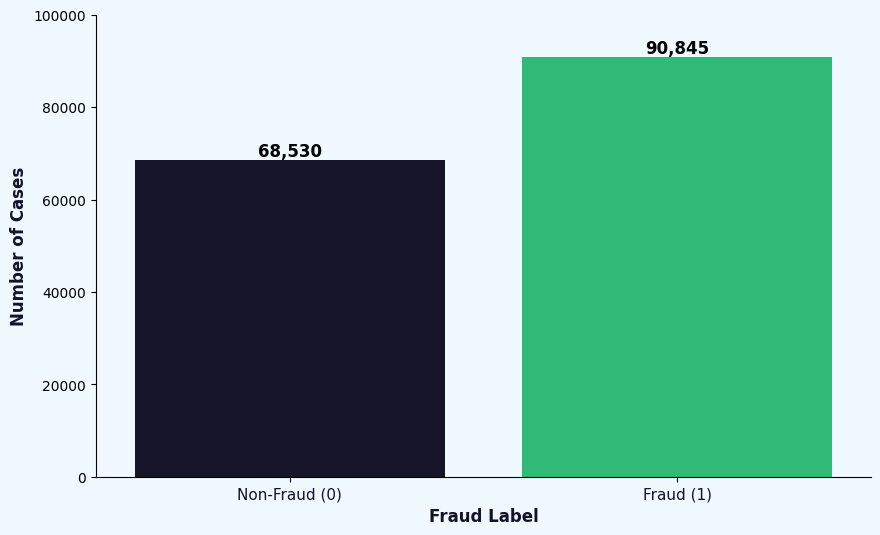

In [31]:
# Choosing the colors
custom_palette = ['#13122d', '#1ad079']
# Creating the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x=y_train_smote, palette=custom_palette)
# Showing values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
# Axis & format
ax.set_xlabel("Fraud Label", fontsize=12, fontweight='bold', color='#13122d')
ax.set_ylabel("Number of Cases", fontsize=12, fontweight='bold', color='#13122d')
ax.set_xticklabels(["Non-Fraud (0)", "Fraud (1)"], fontsize=11, color='#13122D')
ax.set_ylim((0,100000))
ax.set_facecolor('#f0f9ff')
fig.patch.set_facecolor('#f0f9ff')

# Remove the top and right frame
sns.despine()
# Show the graph
plt.show()

In [ ]:
sns.countplot(x=y_train)